In [36]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Buat direktori model kalau belum ada
os.makedirs('model', exist_ok=True)


In [37]:
# Set parameter dasar
img_size = (128, 128)
batch_size = 32

# Preprocessing dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [38]:
train_generator = train_datagen.flow_from_directory(
    'dataset_cleaned/training',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'dataset_cleaned/testing',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3492 images belonging to 4 classes.
Found 873 images belonging to 4 classes.


In [39]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [40]:
history = model.fit(
    train_generator,
    epochs=6,
    validation_data=validation_generator
)


Epoch 1/6
110/110 ━━━━━━━━━━━━━━━━━━━━ 43s 381ms/step - accuracy: 0.7760 - loss: 0.7018 - val_accuracy: 0.9611 - val_loss: 0.1151
Epoch 2/6
110/110 ━━━━━━━━━━━━━━━━━━━━ 41s 373ms/step - accuracy: 0.9547 - loss: 0.1666 - val_accuracy: 0.9885 - val_loss: 0.0469
Epoch 3/6
110/110 ━━━━━━━━━━━━━━━━━━━━ 41s 373ms/step - accuracy: 0.9794 - loss: 0.0707 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 4/6
110/110 ━━━━━━━━━━━━━━━━━━━━ 42s 377ms/step - accuracy: 0.9884 - loss: 0.0358 - val_accuracy: 0.9931 - val_loss: 0.0445
Epoch 5/6
110/110 ━━━━━━━━━━━━━━━━━━━━ 42s 380ms/step - accuracy: 0.9864 - loss: 0.0393 - val_accuracy: 0.9782 - val_loss: 0.0735
Epoch 6/6
110/110 ━━━━━━━━━━━━━━━━━━━━ 42s 381ms/step - accuracy: 0.9890 - loss: 0.0429 - val_accuracy: 0.9954 - val_loss: 0.0336


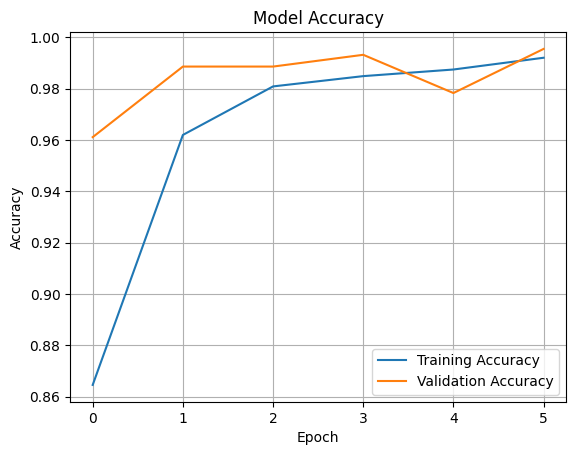

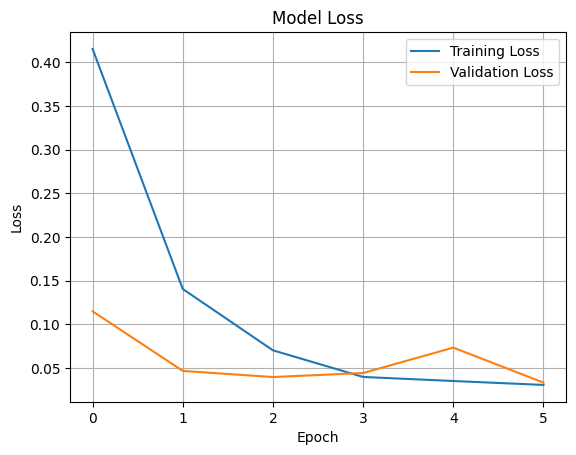

In [41]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [42]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"✅ Final Training Accuracy: {final_train_acc:.2%}")
print(f"✅ Final Validation Accuracy: {final_val_acc:.2%}")


✅ Final Training Accuracy: 99.20%
✅ Final Validation Accuracy: 99.54%


In [43]:
model.save('model/model_telur2.h5')
print("✅ Model berhasil disimpan di 'model/model_telur.h5'")


✅ Model berhasil disimpan di 'model/model_telur.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


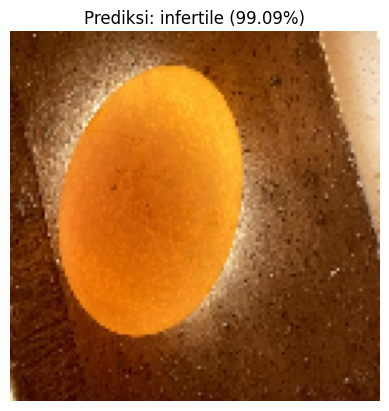

('infertile', np.float32(0.99089515))

In [44]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('model/model_telur2.h5')

# Kelas sesuai urutan folder training kamu
class_names = ['dead', 'fertile', 'infertile']  # Sesuaikan dengan urutan folder dataset training

# Fungsi untuk prediksi satu gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Sesuaikan dengan ukuran training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch
    img_array /= 255.0  # Normalisasi seperti saat training

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predict_image('9_jpg.rf.e62e3247af6ae1642034a8da52f13673.jpg')  # Ganti dengan nama file yang ingin diuji


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


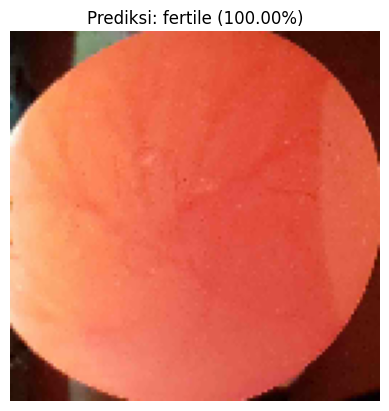

('fertile', np.float32(1.0))

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('model/model_telur2.h5')

# Kelas sesuai urutan folder training kamu
class_names = ['dead', 'fertile', 'infertile']  # Sesuaikan dengan urutan folder dataset training

# Fungsi untuk prediksi satu gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Sesuaikan dengan ukuran training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch
    img_array /= 255.0  # Normalisasi seperti saat training

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predict_image('fertile.fertile-62.jpg.4gqfj74d.ingestion-5774855475-lq9bd.jpg')  # Ganti dengan nama file yang ingin diuji


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


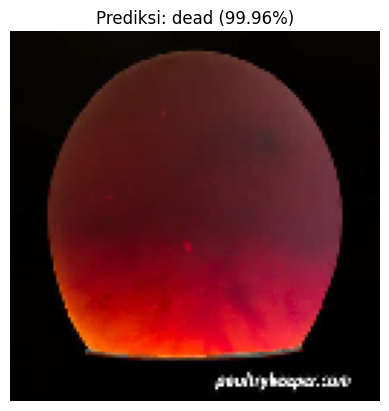

('dead', np.float32(0.9995913))

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('model/model_telur2.h5')

# Kelas sesuai urutan folder training kamu
class_names = ['dead', 'fertile', 'infertile']  # Sesuaikan dengan urutan folder dataset training

# Fungsi untuk prediksi satu gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Sesuaikan dengan ukuran training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch
    img_array /= 255.0  # Normalisasi seperti saat training

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predict_image('dead.dead-1.jpg.4gb9gd3d.ingestion-6bf64f87d9-gzjsg.jpg')  # Ganti dengan nama file yang ingin diuji


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


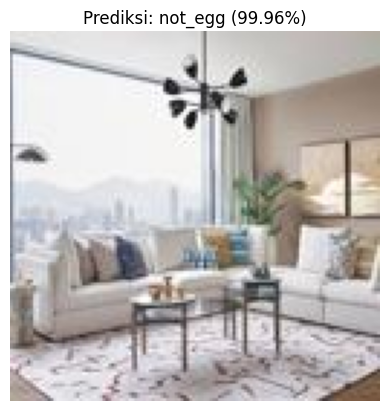

('not_egg', np.float32(0.99960357))

In [50]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('model/model_telur2.h5')

# Kelas sesuai urutan folder training kamu
class_names = ['dead', 'fertile', 'infertile', 'not_egg']  # Sesuaikan dengan urutan folder dataset training

# Fungsi untuk prediksi satu gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Sesuaikan dengan ukuran training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch
    img_array /= 255.0  # Normalisasi seperti saat training

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class, confidence

# Contoh penggunaan
predict_image('000001_2439.jpg')  # Ganti dengan nama file yang ingin diuji
